In [ ]:

# linear regression
# Vehicle CO2 detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('co2.csv')

df.describe()

,engine,cylandr,fuelcomb,out1
count,500.000000,500.000000,500.000000,500.000000
mean,3.600400,6.132000,12.476600,268.026000
std,1.478191,1.832291,3.943025,67.099673
min,1.000000,4.000000,4.800000,110.000000
25%,2.000000,4.000000,9.500000,217.000000
50%,3.600000,6.000000,11.650000,260.000000
75%,5.000000,8.000000,14.800000,317.000000
max,6.800000,12.000000,25.800000,488.000000


<Axes: xlabel='out1', ylabel='count'>

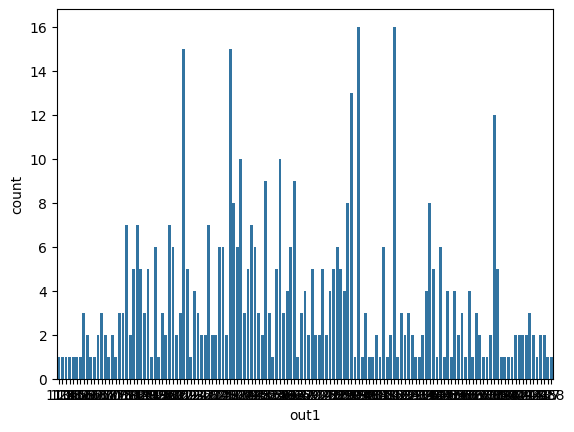

In [3]:
sns.countplot(x='out1',data=df)

<Axes: >

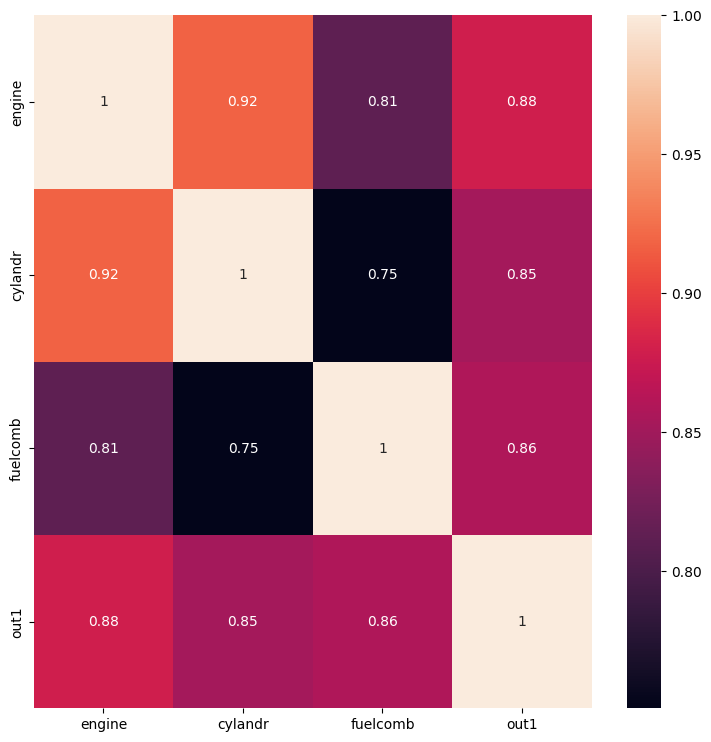

In [5]:
# we want drwing heatmap
plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [5]:
# Specify (x,y)
# Delate x by droping
x = df.drop("out1",axis=1)
y = df.out1


In [7]:
print(x)

     engine  cylandr  fuelcomb
0       2.0        4       8.5
1       2.4        4       9.6
2       1.5        4       5.9
3       3.5        6      11.1
4       3.5        6      10.6
..      ...      ...       ...
495     1.5        4       6.9
496     1.5        4       7.5
497     1.5        4       7.7
498     3.5        6      10.6
499     3.6        6      10.8

[500 rows x 3 columns]


In [8]:
# For splite x and y as train becuase we should trained some of (x) not all
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
x_train,y_train.shape

(     engine  cylandr  fuelcomb
 350     5.4        8      18.3
 18      4.7        8      15.4
 256     1.8        4       7.9
 25      2.0        4       9.3
 361     5.4        8      16.0
 ..      ...      ...       ...
 57      3.0        6      12.4
 345     5.4        8      17.2
 8       3.7        6      11.6
 273     1.4        4       9.0
 205     3.6        6      12.0
 
 [400 rows x 3 columns],
 (400,))

In [10]:
model_reg_linear = linear_model.LinearRegression()

In [11]:
model_reg_linear.max_iter=10000
model_reg_linear.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
out_robot = model_reg_linear.predict(x_test)

In [13]:
out_robot

array([255.42524004, 205.3475618 , 211.80497796, 296.57500197,
       298.26199666, 209.9221069 , 317.71953458, 248.77194751,
       341.22398039, 376.10154515, 189.42519528, 195.12440351,
       317.13190548, 291.81922066, 215.98777034, 208.77214624,
       179.20203699, 197.96135887, 335.66065663, 350.06660729,
       254.66703211, 385.45192577, 268.59594063, 257.69986383,
       185.830032  , 258.45807176, 298.26199666, 371.55229757,
       331.11140905, 301.67592374, 250.11778454, 183.16365548,
       268.59594063, 371.55229757, 338.19114867, 364.27668159,
       198.54898796, 300.34074409, 192.84977972, 206.49752246,
       214.94839663, 301.67592374, 294.47095702, 391.76804341,
       348.55019143, 395.53378553, 378.09500315, 306.60228389,
       186.1964872 , 344.25681211, 268.31477484, 384.91887452,
       185.43827927, 175.41099735, 276.96152538, 248.77194751,
       252.39240832, 255.42524004, 343.37337708, 377.39280433,
       189.98752684, 299.12013417, 411.66268579, 252.39

In [14]:
x_test.size

300

In [15]:
test = np.array([[3]])
test

array([[3]])

In [16]:
y_test

307    251
430    232
402    165
418    264
104    292
      ... 
27     251
420    304
379    336
37     224
494    145
Name: out1, Length: 100, dtype: int64

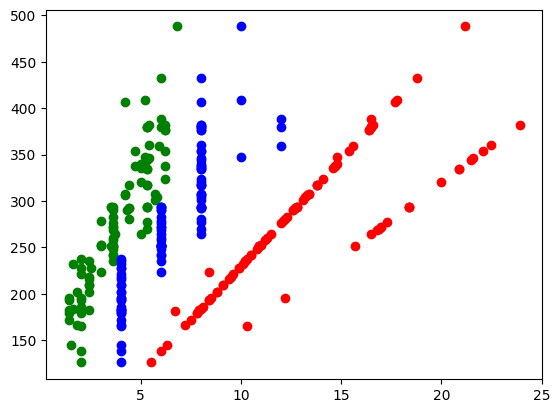

In [17]:
plt.scatter(x_test.engine,y_test, color='green')
plt.scatter(x_test.fuelcomb,y_test, color='red')
plt.scatter(x_test.cylandr,y_test, color='blue')

plt.show()


In [18]:
x_test

,engine,cylandr,fuelcomb
307,3.6,6,10.9
430,1.6,4,10.1
402,2.0,4,10.3
418,5.0,8,11.5
104,4.4,8,12.7
...,...,...,...
27,3.0,6,10.9
420,5.8,8,13.2
379,5.0,8,14.6
37,3.0,6,8.4


In [27]:
y_test

13     359
98     202
193    382
313    317
356    209
      ... 
19     359
161    260
299    294
81     193
165    248
Name: out1, Length: 100, dtype: int64

In [19]:
# ...existing code...
p206 = np.array([[5.2, 12.1, 15.6]])   # شکل (1, 3)
co2 = model_reg_linear.predict(p206)
print(co2)
# ...existing code...

[369.71140446]


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
sm.mean_squared_error(y_test,out_robot)

804.7073806906542